I created feedforward neural network using `Python` and `NumPy`. I started by implementing just a simple neuron, or perceptron, then defined the training algorithm for this simple model.

In [2]:
import numpy as np

### Training data

Let's consider a very simple dataset. The dataset is made of four input vectors $\textbf{x} \in \mathbb{R}^3$ and the corresponding desired target values $y$. In the table below, each row is a single sample; the first three columns are the input vector components, whereas the last column is the target output.

||Input $x_i$||Output $y$|
|:----:|:---:|:---:|---:|
| 1    | 1   | 0   | 1  |
| 1    | 0   | 0   | 1  |
| 0    | 1   | 0   | 0  |
| 0    | 0   | 0   | 0  |

Notice that our target outputs are equal to the first component of the input, therefore the task that the model should learn is very simple. We will see how the perceptron is able to learn that starting from this toy dataset.

Now let's define the `X` and `y` matrices:

In [3]:
# Our input data is a matrix, each row is one input sample
X = np.array([[1,1,0],
              [1,0,0],
              [0,1,0],
              [0,0,0]])

# The target output is a column vector in 2-D array format (.T means transpose)
y = np.array([[1,1,0,0]]).T

print('X =',X)
print('y =',y)

X = [[1 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 0]]
y = [[1]
 [1]
 [0]
 [0]]


### Activation function

As I said before, in order to define a perceptron we need to define the activation function $f(\cdot)$. There are many possibile activation function that can be used, let me plot some of the most common ones:




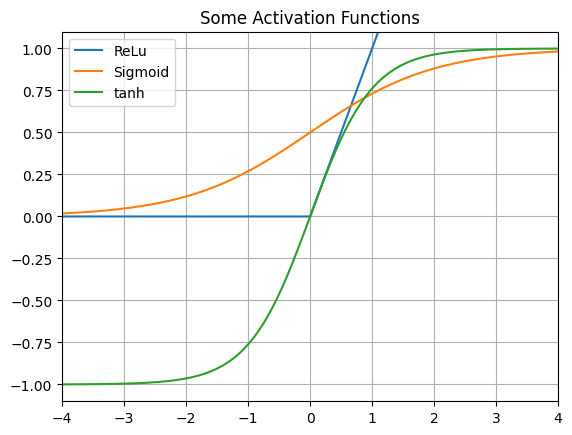

In [4]:
import matplotlib.pyplot as plt

x = np.arange(-4,4,.01)
plt.figure()
plt.plot(x, np.maximum(x,0), label='ReLu')
plt.plot(x, 1/(1+np.exp(-x)), label='Sigmoid')
plt.plot(x, np.tanh(x), label='tanh')
plt.axis([-4, 4, -1.1, 1.1])
plt.title('Some Activation Functions')
plt.grid(True)
l = plt.legend()
plt.show()

# Delete temporary variables, so not to cause any confusion later :-)
del x, l

In this particular exercise I will use the sigmoid function.



In [5]:
def sigma(x):
    # Sigmoid function
    return 1 / ( 1 + np.exp(-x) )

### Weight initialization

Weights are initialised randomly

In [6]:
# fix random seed for reproducibility
np.random.seed([42])

# initialize weights randomly with zero mean and uniformly distributed values in [-1,1]
W = 2 * np.random.random((3,1)) - 1

print('W =', W)

W = [[ 0.2788536 ]
 [-0.94997849]
 [-0.44994136]]


### Forward propagation

Then I implemented one round of forward propagation.  This means taking an input sample and moving it forward through the network, calculating the output of the network eventually.

In [7]:
X0 = np.reshape(X[0], (3,1))
print("X0 =",X0)

X0 = [[1]
 [1]
 [0]]


The output $\hat{y}$ for the first input can be calculated according to the formula given above

In [8]:
y_out = sigma(np.dot(W.T, X0))

print('y_out =', y_out)

y_out = [[0.338245]]


the target result is stored in `y[0]`.  If you check back, you can see we defined it to be $y_0=0$. You can see that our network is pretty far away from the right answer, this is why I need to backpropagate the error, to adjust the weights in the right direction!

### Backpropagation

The following step is updating the weights by propagating the error backwards in the network.

In [9]:
# the learning rate determines the step size in the gradient descent
learning_rate = 0.5

# compute the gradient term
grad = (y_out - y[0]) * y_out * (1 - y_out)

# Calculate the weight update
W_delta = - learning_rate * grad * X0

print("W_delta = ", W_delta)

# Update the weights
W += W_delta
print("Updated weights W = ", W)

W_delta =  [[0.07406207]
 [0.07406207]
 [0.        ]]
Updated weights W =  [[ 0.35291567]
 [-0.87591642]
 [-0.44994136]]


Let's try a forward propagation again with the same input.

In [10]:
print("y_out_old = ", y_out) # let's print the values before the update
y_out = sigma(np.dot(W.T, X0))

print('y_out =', y_out)
print('y[0] =', y[0])

y_out_old =  [[0.338245]]
y_out = [[0.37215083]]
y[0] = [1]


You should notice that the result has moved (slightly!) towards the correct answer. In order to converge to the right value I have to perform more iterations!

#Training iterations
Now I have to define a complete training procedure for our model. In each iteration I have to perform the forward propagation, then I'll check how much the output differs from the target and propagate the error back (backward propagation).  I'll do this for each sample data point and then iterate this over and over again using a for loop.

In [11]:
# For the training I need to iterate over the dataset several times
num_iters = 1000

# I'll also store the mean square error (MSE) in every round so we can see how it evolves
# mse is just an array to store these values at each round:
mse = np.zeros(num_iters)

# Looping for the iterations
for it in range(num_iters):

    # For-loop going over each sample in X
    for n in range(len(X)):
        # Extract the n_th sample and the corresponding desired output
        x_n = np.reshape(X[n], (3,1))
        # Get the correponding target value
        y_target = y[n]

        # Forward propagation of the n_th sample
        y_out = sigma(np.dot(W.T, x_n))

        # Let's keep track of the sum of squared errors
        #--------------------------------------------------------------------------
        mse[it] += (y_out - y_target)**2 #Compute squared error between y_target and y_out
        #--------------------------------------------------------------------------
        # compute the gradient
        grad = (y_out - y_target) * y_out * (1 - y_out)

        # Calculate the weights update
        W_delta = - learning_rate * grad * x_n

        # Update the weights
        W += W_delta

    # Divide by the number of elements to get the mean of the squared errors
    mse[it] /= len(X)

# Now let's see the output for each input sample with the trained weights
print("Output after training, y_out =")
y_out = sigma(np.dot(X, W))
print(y_out)
print("Target output, y =")
print(y)

Output after training, y_out =
[[0.95165668]
 [0.99678794]
 [0.05965052]
 [0.5       ]]
Target output, y =
[[1]
 [1]
 [0]
 [0]]


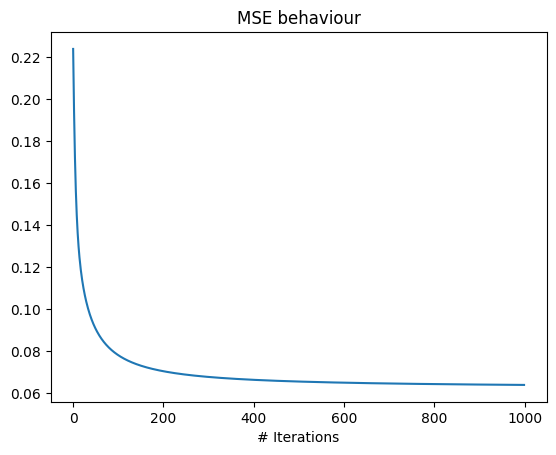

In [12]:
plt.figure()
plt.plot(range(num_iters), mse, label="MSE")
plt.xlabel("# Iterations")
plt.title("MSE behaviour")
plt.show()

You should see the error going down pretty quickly in the beginning and then slowing down.

### Batch training

It is unefficient to handle each example one-by-one like we did above. Instead, one typically uses a set, so called mini-batch, of several input examples at once.


In [13]:
y_out = sigma(np.dot(X, W))
print("y_out =", y_out)

y_out = [[0.95165668]
 [0.99678794]
 [0.05965052]
 [0.5       ]]


Two-layer Neural Network

Let's consider the following training set:

> Блок с отступами



||Input||         Output|
|:----:|:---:|:---:|---:|
| $x_1$|$x_2$|$x_3$| $y$|
| 0    | 0   | 0   | 1  |
| 0    | 0   | 1   | 1  |
| 0    | 1   | 0   | 1  |
| 0    | 1   | 1   | 0  |
| 1    | 0   | 0   | 1  |
| 1    | 0   | 1   | 0  |
| 1    | 1   | 0   | 1  |
| 1    | 1   | 1   | 1  |

In particular, the new input-output configuration represents the following relation between three input vector components:
$$
y = \text{NOT}((x_0 \: \text{XOR} \: x_1) \: \text{AND} \: x_2)
$$

Where $x_0$, $x_1$ and $x_2$ correspond the input vector components, and $\text{NOT}$, $\text{XOR}$ and $\text{AND}$ stands for the corresponding logical operations.

As an example, coinsider the first sample (row), $x_0 \: \text{XOR} \: x_1$ is $0$ and the $\text{AND}$ operation between it and $x_3$ is again $0$. The negation of $0$ is $1$, which indeed has been reported as the target value for this sample.


This problem is interesting because it can not be solved by using a single layer perceptron. Indeed, you will need (at least) a two-layer network to solve it. So I will build a two-layer NN

In [14]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed([42])

X = np.array([[0,0,0],
              [0,0,1],
              [0,1,0],
              [0,1,1],
              [1,0,0],
              [1,0,1],
              [1,1,0],
              [1,1,1]])

y = np.array([[1,1,1,0,1,0,1,1]]).T

In [15]:
# Weights initialization
W = 2 * np.random.random((3,1)) - 1

# Activation function
def sigma(x):
    return 1 / (1 + np.exp(-x) )

In [17]:
num_iters = 10000
learning_rate = 0.5

for it in range(num_iters):
    for n in range(len(X)):
        x_n = np.reshape(X[n], (3,1))
        y_target = y[n]

        # Forward propagation
        y_out = sigma(np.dot(W.T, x_n))

        # Compute the Gradient
        grad = (y_out - y_target)*y_out*(1 - y_out)

        # Calculate the weights update
        W_delta = -learning_rate * grad * x_n

        # Update the weights
        W += W_delta


# Now let's see the output for each input sample with the trained weights
y_out = sigma(np.dot(X, W))
print("Output after training, y_out =")
print(y_out)
print("Desired output, y = ")
print(y)
print("Difference = ", np.linalg.norm(y-y_out))

Output after training, y_out =
[[5.00000000e-01]
 [5.90851501e-06]
 [9.99654306e-01]
 [1.67989231e-02]
 [9.99654366e-01]
 [1.68017683e-02]
 [9.99999880e-01]
 [9.80165228e-01]]
Desired output, y = 
[[1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]]
Difference =  1.1184571262986422


It could'n solve our problem. So, that's why I need to add hidden layers to my NN.

In [18]:
num_hidden = 4

# initialize weights randomly with zero mean and uniformly distributed values in [-1,1]
W_1 = 2 * np.random.random((3,num_hidden)) - 1
W_2 = 2 * np.random.random((num_hidden,1)) - 1

In [20]:
num_iters = 2000
learning_rate = 0.5 # learning rate

mse = np.zeros(num_iters)

for it in range(num_iters):
    for n in range(len(X)):
        x_n = np.reshape(X[n], (3,1))
        y_target = y[n]

        ## Forward propagation
        # Calculate h
        h = sigma((np.dot(W_1.T, x_n))) # [TO COMPLETE]

        # Calculate y_out
        y_out = sigma(np.dot(W_2.T, h)) # [TO COMPLETE]

        # Let's keep track of the sum of squared errors
        mse[it] += (y_out - y_target) ** 2 # [TO COMPLETE]

        # Compute the gradient
        grad_W_2 = (y_out - y_target) * (y_out * (1 - y_out))
        grad_hidden_layer = np.dot(W_2, grad_W_2) * h * (1 - h)

        # Calculate the weight updates for W_1
        grad_W_1 = np.zeros((3,num_hidden))
        for i in range(num_hidden):
          for k in range(W_1.shape[0]): #3
            grad_W_1[k][i] = x_n[k] * grad_hidden_layer[i]

        # Update the weights, note: it's important the W weights are updated at the end,
        # the above calculation should be done with the old weights
        W_2 = np.add(W_2, - learning_rate * grad_W_2 * h) # dwJ = g * h
        W_1 = np.add(W_1, - learning_rate * grad_W_1)

    # Divide by the number of elements to get the mean of the squared errors
    mse[it] /= len(X)

# Compute output
y_out = sigma(np.dot(sigma(np.dot(X, W_1)), W_2))
print("Output after training, y_out =")
print(y_out)
print("Desired output, y = ")
print(y)
print("Difference = ", np.linalg.norm(y-y_out))

Output after training, y_out =
[[0.99834218]
 [0.97366395]
 [0.99438552]
 [0.03277521]
 [0.99439011]
 [0.03282563]
 [0.98997619]
 [0.96913029]]
Desired output, y = 
[[1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]]
Difference =  0.06296413028637403


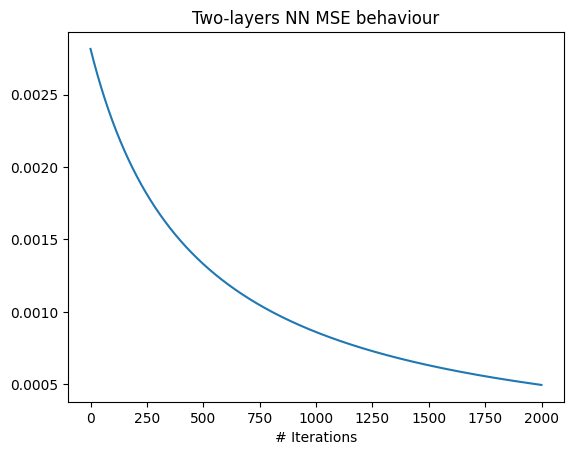

In [21]:
plt.figure()
plt.plot(range(num_iters), mse, label="MSE")
plt.xlabel("# Iterations")
plt.title("Two-layers NN MSE behaviour")
plt.show()

### Handwritten digits classification
l will use NN for digit classification, but now I'll use softmax activation function and cross-entropy loss function. The idea is to create a model that has in input an image of a handwritten digit and that return a vector of 10 probabilities (one for each possible digit $0-9$).

### Dataset
The dataset is called `load_digits` and contains several hundreds of samples. Each datapoint is made of the handwritten digit image (or rather its $8\times8$ pixel representation), that will be the input of my model, and the target digit value.

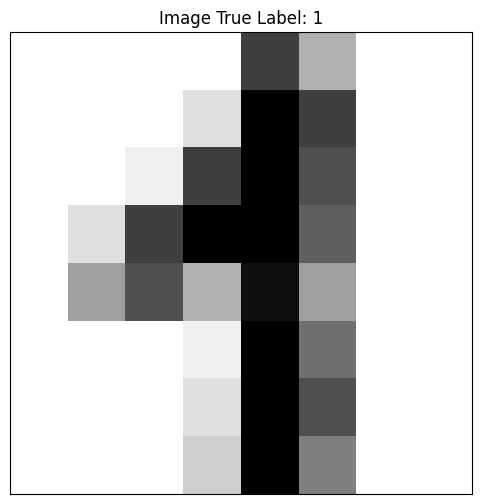

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

np.random.seed([42])

digits = load_digits()

def plot_digit(x, y):
  plt.figure(figsize=(6, 6))
  plt.imshow(x, cmap=plt.cm.gray_r,
            interpolation='nearest')
  plt.title("Image True Label: %d" % y)
  plt.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
  plt.show()

sample_index = 42
plot_digit(digits.images[sample_index], digits.target[sample_index])

It is better to check how an input in the dataset $\mathbf{X}$ and its related target $\mathbf{y}$ are represented in the dataset:

In [23]:
data = np.asarray(digits.images[sample_index], dtype='float32')
target = np.asarray(digits.target[sample_index], dtype='int32')

np.set_printoptions(threshold=np.inf) # In this way we print the full array
print("X:", data)
print("y:", target)

X: [[ 0.  0.  0.  0. 12.  5.  0.  0.]
 [ 0.  0.  0.  2. 16. 12.  0.  0.]
 [ 0.  0.  1. 12. 16. 11.  0.  0.]
 [ 0.  2. 12. 16. 16. 10.  0.  0.]
 [ 0.  6. 11.  5. 15.  6.  0.  0.]
 [ 0.  0.  0.  1. 16.  9.  0.  0.]
 [ 0.  0.  0.  2. 16. 11.  0.  0.]
 [ 0.  0.  0.  3. 16.  8.  0.  0.]]
y: 1


In [24]:
# the dataset is the flattened version of all the images ( 8 x 8 = 64 values for 1797 images)
print(digits.data.shape)

(1797, 64)


So essentialy the dataset is a matrix with the (color) values for each pixel and for each image, whereas the target is the digit itself.

#### One-hot encoding
In order to have a representation of the target that will be similar to the output of the model (i.e. $\hat{y}=0$ or $1$ for each of the 10 digits), I will use one-hot encoding. Basically, the one-hot encoding allow us to encode a categorical integer feature using a one-of-K scheme, where each class is translated to a specific index of an array.

In [25]:
def one_hot(n_classes, y):
    return np.eye(n_classes)[y]

For example, if there are 10 classes in total and a sample belongs to class number 3, we can translate the output to the following lenght-ten array of 0 and 1 (class 3 is in the fourth index because we start counting from zero!):

In [26]:
one_hot(n_classes=10, y=3)

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

### Activation Function - Softmax
This particular function is very useful when we have to deal with multiclassification tasks and one-hot target because it turns numbers, a.k.a. logits (pre-activations), into $m$ probabilities that sum to one. Basically, Softmax function outputs a vector that represents the probability distributions of a list of potential outcomes $j$:
$$
softmax(\mathbf{x})_j = \frac{e^{x_j}}{\sum_{i=1}^{m}{e^{x_i}}}
$$

In [28]:
def softmax(x):
  exp_x = np.exp(x)
  sum_exp = np.sum(exp_x)
  return (exp_x / sum_exp)

### Loss Function: Cross Entropy ###
Usually, a neural network classifier that use the softmax function in the final layer is trained using Cross-Entropy as loss function:
$$H(Y,P)=-E_{y \sim Y}[log \;P(y)]$$
where $Y$ and $P$ are the true and predicted labels distributions.

In [29]:
EPSILON = 1e-8 # this is needed for numerical stability

def cross_entropy(Y_true, Y_pred):
    Y_true, Y_pred = np.atleast_2d(Y_true), np.atleast_2d(Y_pred) # make sure the dimensions are right
    loglikelihoods = np.sum(np.log(EPSILON + Y_pred) * Y_true, axis=1)
    return -np.mean(loglikelihoods)

### Weights Initailiazation


In [30]:
np.random.seed([42])

input_size = digits.data.shape[1]
n_classes = len(np.unique(digits.target))

W = np.random.uniform(size=(input_size,n_classes), high=0.1, low=-0.1)
b = np.random.uniform(size=n_classes, high=0.1, low=-0.1)

Let's consider a sample from the training set, and plot the current output of our model before training it.

<ipython-input-31-d65ba2b6fc67>:3: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 1, 0.1)


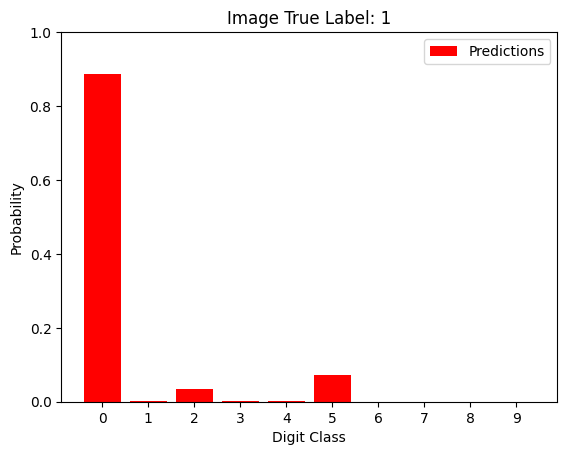

In [31]:
def plot_predictions(y_out, true_label):
  plt.bar(range(n_classes), y_out, label="Predictions", color="red")
  plt.ylim(0, 1, 0.1)
  plt.xticks(range(n_classes))
  plt.legend()
  plt.ylabel("Probability")
  plt.xlabel("Digit Class")
  plt.title("Image True Label: %d" % true_label)
  plt.show()

y_out = softmax(np.dot(digits.data[sample_index], W) + b)
plot_predictions(y_out, digits.target[sample_index])

We see that the most likely predictions for our _untrained_ model is just $0$ (or it could have been any other random guess) for the handwritten $1$.

### Training



In [33]:
num_iters = 50
learning_rate = 0.0005

for it in range(num_iters):
    iteration_accuracy = []
    iteration_loss = []
    for i, (X, y) in enumerate(zip(digits.data, digits.target)):

        # implement forward propagation
        y_out = softmax(np.dot(X, W) + b)

        # compute the error
        pred_error = y_out - one_hot(n_classes, y)

        grad = np.outer(X, pred_error) # compute the gradient


        # update the weights
        W -= learning_rate * grad
        b -= learning_rate * pred_error

        iteration_accuracy.append(np.argmax(y_out) == y)
        iteration_loss.append(cross_entropy(one_hot(n_classes,y), y_out))

    print(f"iteration: {it}, -- accuracy: {np.mean(np.asarray(iteration_accuracy)):.2%}, -- loss: {np.mean(iteration_loss):.4f}")

iteration: 0, -- accuracy: 99.78%, -- loss: 0.0243
iteration: 1, -- accuracy: 99.78%, -- loss: 0.0239
iteration: 2, -- accuracy: 99.78%, -- loss: 0.0236
iteration: 3, -- accuracy: 99.78%, -- loss: 0.0232
iteration: 4, -- accuracy: 99.78%, -- loss: 0.0229
iteration: 5, -- accuracy: 99.78%, -- loss: 0.0226
iteration: 6, -- accuracy: 99.78%, -- loss: 0.0223
iteration: 7, -- accuracy: 99.78%, -- loss: 0.0220
iteration: 8, -- accuracy: 99.78%, -- loss: 0.0217
iteration: 9, -- accuracy: 99.78%, -- loss: 0.0214
iteration: 10, -- accuracy: 99.78%, -- loss: 0.0211
iteration: 11, -- accuracy: 99.78%, -- loss: 0.0209
iteration: 12, -- accuracy: 99.78%, -- loss: 0.0206
iteration: 13, -- accuracy: 99.78%, -- loss: 0.0203
iteration: 14, -- accuracy: 99.78%, -- loss: 0.0201
iteration: 15, -- accuracy: 99.78%, -- loss: 0.0198
iteration: 16, -- accuracy: 99.78%, -- loss: 0.0196
iteration: 17, -- accuracy: 99.78%, -- loss: 0.0194
iteration: 18, -- accuracy: 99.78%, -- loss: 0.0191
iteration: 19, -- accu

As you can see during the training the accuracy increases after each iteration, while the loss function value progressively declines.

Finally, let's check how the prediction capability of our model changes after the training:

<ipython-input-31-d65ba2b6fc67>:3: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 1, 0.1)


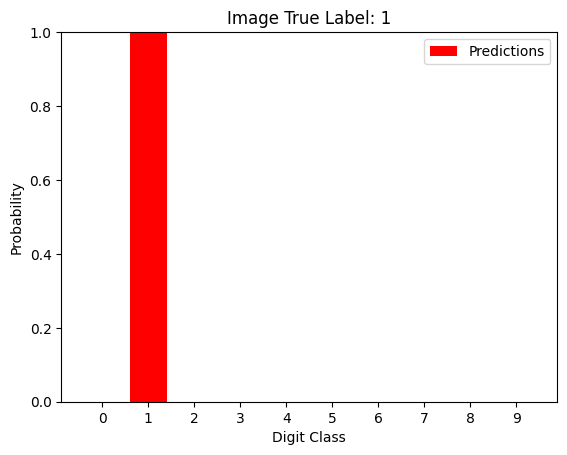

In [34]:
y_out = softmax(np.dot(digits.data[sample_index], W) + b)
plot_predictions(y_out, digits.target[sample_index])

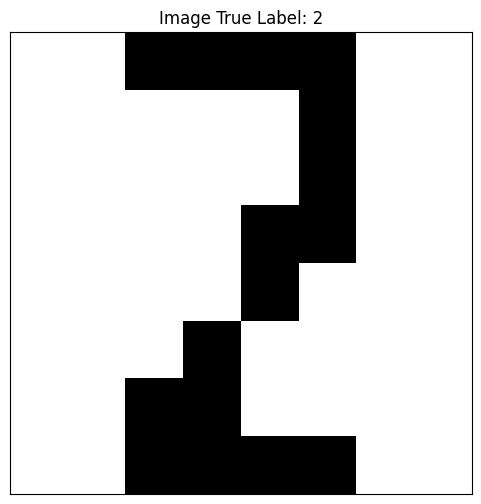

<ipython-input-31-d65ba2b6fc67>:3: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 1, 0.1)


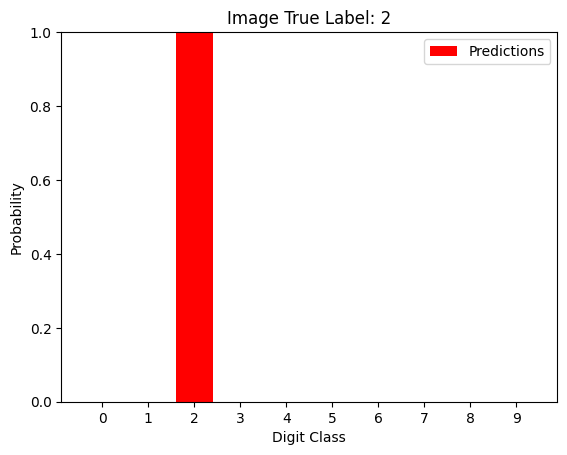

In [35]:
test_num = 2
px = 10
test_img = np.array([
                    [0.,  0.,  px,  px, px,  px,  0.,  0.],
                    [0.,  0.,  0.,  0., 0.,  px,  0.,  0.],
                    [0.,  0.,  0.,  0., 0.,  px,  0.,  0.],
                    [0.,  0.,  0.,  0., px,  px,  0.,  0.],
                    [0.,  0.,  0.,  0., px,  0.,  0.,  0.],
                    [0.,  0.,  0.,  px, 0.,  0.,  0.,  0.],
                    [0.,  0.,  px,  px, 0.,  0.,  0.,  0.],
                    [0.,  0.,  px,  px, px,  px,  0.,  0.]
])
plot_digit(test_img, test_num)

test_img = test_img.flatten() # flatten the array to length (64, )
y_pred = softmax(np.dot(test_img, W) + b)
plot_predictions(y_pred, test_num)

### Different images

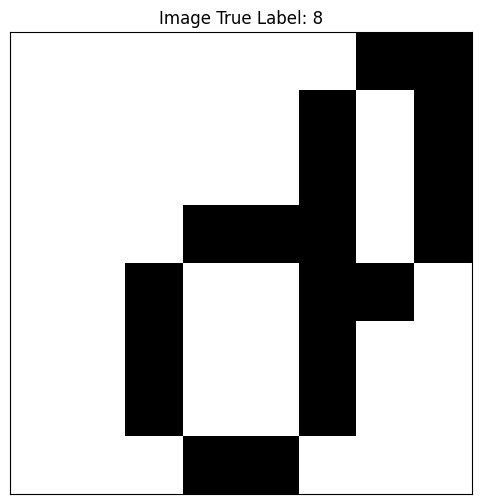

<ipython-input-31-d65ba2b6fc67>:3: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 1, 0.1)


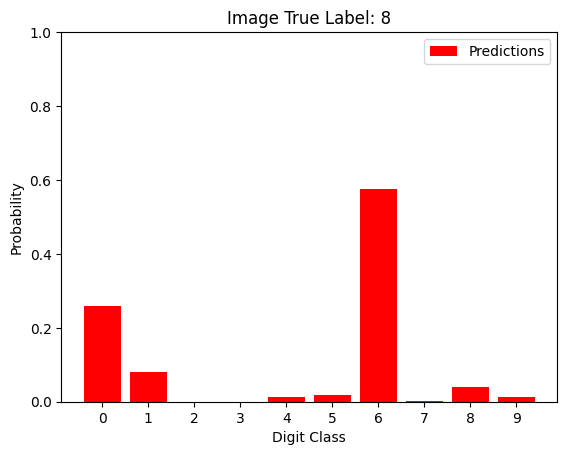

In [36]:
test_num = 8
px = 10
test_img = np.array([
                    [0.,  0.,  0.,  0., 0.,  0.,  px,  px],
                    [0.,  0.,  0.,  0., 0.,  px,  0.,  px],
                    [0.,  0.,  0.,  0., 0.,  px,  0.,  px],
                    [0.,  0.,  0.,  px, px,  px,  0.,  px],
                    [0.,  0.,  px,  0., 0.,  px,  px,  0.],
                    [0.,  0.,  px,  0., 0.,  px,  0.,  0.],
                    [0.,  0.,  px,  0., 0.,  px,  0.,  0.],
                    [0.,  0.,  0.,  px, px,  0.,  0.,  0.]
])
plot_digit(test_img, test_num)

test_img = test_img.flatten() # flatten the array to length (64, )
y_pred = softmax(np.dot(test_img, W) + b)
plot_predictions(y_pred, test_num)